<a href="https://colab.research.google.com/github/Tatyana-Karpenko/Coursera_05August22/blob/main/Midterm2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load text from manually uploaded file
file_path = '/content/Sense and Sensibility.txt'

try:
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
    print("File loaded successfully. Preview:")
    print(text[:500])  # show first 500 characters
except Exception as e:
    print("Error loading the file:", e)


File loaded successfully. Preview:
Title: Sense and Sensibility

Author: Jane Austen

Release date: September 1, 1994 [eBook #161]
                Most recently updated: March 16, 2021

Language: English



*** START OF THE PROJECT GUTENBERG EBOOK SENSE AND SENSIBILITY ***

[Illustration]




Sense and Sensibility

by Jane Austen

(1811)


Contents

 CHAPTER I
 CHAPTER II
 CHAPTER III
 CHAPTER IV
 CHAPTER V
 CHAPTER VI
 CHAPTER VII
 CHAPTER VIII
 CHAPTER IX
 CHAPTER X
 CHAPTER XI
 CHAPTER XII
 CHAPTER XIII
 CHAPTER XIV
 CHAPTER X


In [ ]:
# Install all necessary libraries in one go
!pip install --quiet nltk spacy gensim textblob scikit-learn matplotlib

# Download necessary models and datasets
!python -m spacy download en_core_web_sm

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 74.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import os

# Define the data path
# data_path = '/path/to/your/data'  # Replace with the actual path to your data directory
# The previous line used a placeholder. Replace with the actual path to your data.
# If your .txt file is in the current directory (often represented by '.'), use:
data_path = '.'

texts = {}
for fname in os.listdir(data_path):
    if fname.endswith('.txt'):
        full = os.path.join(data_path, fname)
        with open(full, 'r', encoding='utf-8') as f:
            texts[fname] = f.read()

print(f"Loaded {len(texts)} texts:", list(texts.keys()))

Loaded 2 texts: ['Sense and Sensibility.txt', 'Sense and Sensibility (1).txt']


In [ ]:
# 1) Установить и загрузить нужные библиотеки
!pip install --quiet nltk
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') # Download the 'punkt_tab' resource

# 2) Прочитать текст
with open('Sense and Sensibility.txt','r',encoding='utf-8') as f:
    text = f.read()

# 3) Подсчёт слов, предложений, абзацев
from nltk.tokenize import word_tokenize, sent_tokenize

words      = word_tokenize(text)
sentences  = sent_tokenize(text)
paragraphs = [p for p in text.split('\n\n') if p.strip()]

print('Total words:     ', len(words))
print('Total sentences: ', len(sentences))
print('Total paragraphs:', len(paragraphs))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Total words:      143608
Total sentences:  4085
Total paragraphs: 1917


In [ ]:
# Install & load libraries (in Colab)
!pip install --quiet nltk spacy
!python -m spacy download en_core_web_sm

import nltk, spacy
from nltk.tokenize import word_tokenize
from nltk.stem    import PorterStemmer
from nltk.corpus  import stopwords

# Download NLTK data (once)
nltk.download('punkt')
nltk.download('stopwords')

# Initialize spaCy and NLTK tools
nlp       = spacy.load('en_core_web_sm')
stemmer   = PorterStemmer()
nl_stop   = set(stopwords.words('english'))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 81.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')  # only once

tokens = word_tokenize(text)
print(f"✅ Total tokens: {len(tokens)}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


✅ Total tokens: 143608


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

doc = nlp(text)
lemmas = [token.lemma_ for token in doc]
print(f"✅ Total lemmas: {len(lemmas)}")


✅ Total lemmas: 155931


In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stems = [stemmer.stem(token) for token in tokens]  # use tokens from step 1
print(f"✅ Total stems: {len(stems)}")


✅ Total stems: 143608


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

tokens = word_tokenize(text)

print("🔹 Tokenized words:")
print(tokens[:50])  # show first 50 words


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


🔹 Tokenized words:
['Title', ':', 'Sense', 'and', 'Sensibility', 'Author', ':', 'Jane', 'Austen', 'Release', 'date', ':', 'September', '1', ',', '1994', '[', 'eBook', '#', '161', ']', 'Most', 'recently', 'updated', ':', 'March', '16', ',', '2021', 'Language', ':', 'English', '*', '*', '*', 'START', 'OF', 'THE', 'PROJECT', 'GUTENBERG', 'EBOOK', 'SENSE', 'AND', 'SENSIBILITY', '*', '*', '*', '[', 'Illustration', ']']


In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stems = [stemmer.stem(token) for token in tokens]

print("\n🔻 Stemmed words:")
print(stems[:50])  # show first 50 stems



🔻 Stemmed words:
['titl', ':', 'sens', 'and', 'sensibl', 'author', ':', 'jane', 'austen', 'releas', 'date', ':', 'septemb', '1', ',', '1994', '[', 'ebook', '#', '161', ']', 'most', 'recent', 'updat', ':', 'march', '16', ',', '2021', 'languag', ':', 'english', '*', '*', '*', 'start', 'of', 'the', 'project', 'gutenberg', 'ebook', 'sens', 'and', 'sensibl', '*', '*', '*', '[', 'illustr', ']']


In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(token) for token in tokens]

print("\n🔸 Lemmatized words:")
print(lemmas[:50])


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



🔸 Lemmatized words:
['Title', ':', 'Sense', 'and', 'Sensibility', 'Author', ':', 'Jane', 'Austen', 'Release', 'date', ':', 'September', '1', ',', '1994', '[', 'eBook', '#', '161', ']', 'Most', 'recently', 'updated', ':', 'March', '16', ',', '2021', 'Language', ':', 'English', '*', '*', '*', 'START', 'OF', 'THE', 'PROJECT', 'GUTENBERG', 'EBOOK', 'SENSE', 'AND', 'SENSIBILITY', '*', '*', '*', '[', 'Illustration', ']']


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))
filtered_nltk = [token for token in tokens if token.lower() not in stop_words]
print(f"✅ Tokens after built-in stop-word removal: {len(filtered_nltk)}")


✅ Tokens after built-in stop-word removal: 76788


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Add your own custom stop-words
custom_stopwords = stop_words.union({"said", "shall", "one"})

filtered_manual = [token for token in tokens if token.lower() not in custom_stopwords]
print(f"✅ Tokens after manual stop-word removal: {len(filtered_manual)}")


In [ ]:
custom_stopwords = stop_words.union({
    # Already included
    "said", "shall", "one",

    # Articles
    "a", "an", "the",

    # Linking words
    "and", "but", "or", "so", "because", "although", "however",
    "moreover", "therefore", "thus", "furthermore", "meanwhile",
    "then", "also", "besides", "instead", "otherwise", "hence",
    "indeed", "consequently", "additionally", "still", "yet",

    # Pronouns
    "i", "you", "he", "she", "it", "we", "they", "me", "him", "her", "us", "them",
    "my", "your", "his", "its", "our", "their", "mine", "yours", "hers", "ours", "theirs",
    "this", "that", "these", "those", "someone", "anyone", "everyone", "anything", "nothing",

    # General verbs
    "be", "is", "am", "are", "was", "were", "been", "being",
    "have", "has", "had", "do", "does", "did",
    "can", "could", "may", "might", "must", "will", "would", "should",

    # Adverbs
    "very", "really", "just", "even", "only", "still", "too",
    "quite", "rather", "somewhat", "approximately", "about",
    "almost", "nearly", "perhaps", "maybe", "probably", "possibly",

    # Fillers
    "like", "well", "ok", "yes", "no", "uh", "um", "oh",
    "actually", "basically", "literally", "anyway"
})


In [ ]:
# 📘 Анализ книги: "Sense and Sensibility" by Jane Austen

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Загрузка ресурсов NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# 📥 Загрузка текста книги (предполагаем, что файл загружен в Colab)
with open("Sense and Sensibility.txt", "r", encoding="utf-8") as file:
    text = file.read()

# 1. Токенизация
tokens = word_tokenize(text)

# 2. Удаление пунктуации и приведение к нижнему регистру
tokens = [token.lower() for token in tokens if token.isalpha()]

# 3. Расширенный список стоп-слов
custom_stopwords = set(stopwords.words('english')).union({
    # Articles & linking words
    "a", "an", "the", "and", "but", "or", "so", "because", "although", "however",
    "moreover", "therefore", "thus", "furthermore", "then", "also", "besides",
    "instead", "otherwise", "hence", "indeed", "additionally", "still", "yet",

    # Pronouns
    "i", "you", "he", "she", "it", "we", "they", "me", "him", "her", "us", "them",
    "my", "your", "his", "its", "our", "their", "mine", "yours", "hers", "ours", "theirs",
    "this", "that", "these", "those",

    # Verbs & fillers
    "be", "is", "am", "are", "was", "were", "been", "being", "have", "has", "had",
    "do", "does", "did", "can", "could", "may", "might", "must", "will", "would", "should",
    "said", "shall", "one",

    # Adverbs & modifiers
    "very", "really", "just", "even", "only", "too", "quite", "rather", "somewhat",
    "almost", "nearly", "perhaps", "maybe", "probably", "possibly",
    "like", "well", "actually", "basically", "literally", "anyway"
})

# 4. Удаление стоп-слов
filtered_tokens = [token for token in tokens if token not in custom_stopwords]

# 5. Стемминг
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

# 6. Лемматизация
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

# 7. Вывод первых 70 токенов
print(f"✅ Количество токенов после удаления стоп-слов: {len(filtered_tokens)}\n")

print("🔹 Первые 70 очищенных токенов:")
print(filtered_tokens[:70])

print("\n🔹 Первые 70 стеммированных токенов:")
print(stemmed_tokens[:70])

print("\n🔹 Первые 70 лемматизированных токенов:")
print(lemmatized_tokens[:70])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


✅ Количество токенов после удаления стоп-слов: 48943

🔹 Первые 70 очищенных токенов:
['title', 'sense', 'sensibility', 'author', 'jane', 'austen', 'release', 'date', 'september', 'ebook', 'recently', 'updated', 'march', 'language', 'english', 'start', 'project', 'gutenberg', 'ebook', 'sense', 'sensibility', 'illustration', 'sense', 'sensibility', 'jane', 'austen', 'contents', 'chapter', 'chapter', 'ii', 'chapter', 'iii', 'chapter', 'iv', 'chapter', 'v', 'chapter', 'vi', 'chapter', 'vii', 'chapter', 'viii', 'chapter', 'ix', 'chapter', 'x', 'chapter', 'xi', 'chapter', 'xii', 'chapter', 'xiii', 'chapter', 'xiv', 'chapter', 'xv', 'chapter', 'xvi', 'chapter', 'xvii', 'chapter', 'xviii', 'chapter', 'xix', 'chapter', 'xx', 'chapter', 'xxi', 'chapter', 'xxii']

🔹 Первые 70 стеммированных токенов:
['titl', 'sens', 'sensibl', 'author', 'jane', 'austen', 'releas', 'date', 'septemb', 'ebook', 'recent', 'updat', 'march', 'languag', 'english', 'start', 'project', 'gutenberg', 'ebook', 'sens', 'sensi

In [ ]:
from nltk.corpus import stopwords
# загружаем стандартный набор английских стоп-слов
stop_words = set(stopwords.words('english'))


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

doc = nlp(text)
entities = [(ent.text, ent.label_) for ent in doc.ents]
# Выводим 20 самых частых сущностей
from collections import Counter
ent_counts = Counter(entities)
print(ent_counts.most_common(20))


[(('Marianne', 'PERSON'), 527), (('Elinor', 'PERSON'), 353), (('Edward', 'PERSON'), 230), (('Jennings', 'PERSON'), 228), (('Willoughby', 'PERSON'), 186), (('Lucy', 'PERSON'), 165), (('Dashwood', 'PERSON'), 145), (('first', 'ORDINAL'), 144), (('Brandon', 'PERSON'), 138), (('John', 'PERSON'), 105), (('one', 'CARDINAL'), 100), (('Ferrars', 'PERSON'), 98), (('two', 'CARDINAL'), 91), (('Lady Middleton', 'PERSON'), 75), (('Palmer', 'PERSON'), 66), (('Elinor', 'ORG'), 64), (('Norland', 'ORG'), 51), (('Barton', 'ORG'), 39), (('Margaret', 'PERSON'), 35), (('John Dashwood', 'PERSON'), 33)]


In [ ]:
from textblob import TextBlob

blob = TextBlob(text)
print('Overall polarity:', blob.sentiment.polarity)
print('Overall subjectivity:', blob.sentiment.subjectivity)

# По главам или по абзацам:
sections = text.split('\n\n\n')[:10]  # первые 10 «глав»
for i, sec in enumerate(sections,1):
    sec_blob = TextBlob(sec)
    print(f'Chapter {i}: polarity={sec_blob.sentiment.polarity:.2f}, subjectivity={sec_blob.sentiment.subjectivity:.2f}')


Overall polarity: 0.1313195842015479
Overall subjectivity: 0.5304942115567082
Chapter 1: polarity=0.17, subjectivity=0.25
Chapter 2: polarity=0.00, subjectivity=0.00
Chapter 3: polarity=0.00, subjectivity=0.00
Chapter 4: polarity=0.00, subjectivity=0.00
Chapter 5: polarity=0.00, subjectivity=0.00
Chapter 6: polarity=0.17, subjectivity=0.49
Chapter 7: polarity=0.00, subjectivity=0.00
Chapter 8: polarity=0.15, subjectivity=0.55
Chapter 9: polarity=0.00, subjectivity=0.00
Chapter 10: polarity=0.14, subjectivity=0.51


In [ ]:
from nltk.corpus import wordnet as wn
def get_synonyms_antonyms(word):
    syns = set()
    ants = set()
    for syn in wn.synsets(word):
        for lemma in syn.lemmas():
            syns.add(lemma.name())
            if lemma.antonyms():
                ants.add(lemma.antonyms()[0].name())
    return syns, ants

print(get_synonyms_antonyms('love'))


({'make_out', 'do_it', 'enjoy', 'have_sex', 'dearest', 'passion', 'sleep_with', 'bed', 'be_intimate', 'lovemaking', 'honey', 'bang', 'screw', 'get_it_on', 'bonk', 'lie_with', 'get_laid', 'have_it_off', 'eff', 'dear', 'know', 'have_intercourse', 'jazz', 'sexual_love', 'fuck', 'have_a_go_at_it', 'make_love', 'erotic_love', 'have_it_away', 'making_love', 'love_life', 'sleep_together', 'love', 'beloved', 'hump', 'roll_in_the_hay'}, {'hate'})


In [ ]:
import re
adjs = []
for sent in doc.sents:
    for ent in sent.ents:
        if ent.label_ == 'PERSON':
            # ищем прилагательные в пределах этого предложения
            adjs += [tok.text for tok in sent if tok.pos_ == 'ADJ']
from collections import Counter
print('Top adjectives describing characters:', Counter(adjs).most_common(20))


Top adjectives describing characters: [('own', 267), ('such', 189), ('other', 182), ('more', 179), ('great', 139), ('good', 128), ('much', 121), ('little', 113), ('many', 107), ('sure', 107), ('same', 102), ('first', 100), ('happy', 93), ('dear', 88), ('few', 74), ('able', 74), ('next', 73), ('young', 70), ('particular', 65), ('last', 57)]


In [ ]:
tokens = [w.lower() for w in tokens if w.isalpha()]
ttr = len(set(tokens)) / len(tokens)
print('Type–Token Ratio:', round(ttr, 4))


Type–Token Ratio: 0.0538


In [ ]:
# spaCy автоматически даёт вектор для каждого токена
vector = nlp('love').vector  # 300-мерный вектор
# Косинусная близость между двумя словами:
from scipy.spatial.distance import cosine
print('Similarity love–marriage:', 1 - cosine(nlp('love').vector, nlp('marriage').vector))


Similarity love–marriage: 0.5929123


In [ ]:
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
bcf = BigramCollocationFinder.from_words([w.lower() for w in tokens])
print('Top collocations:', bcf.nbest(BigramAssocMeasures.likelihood_ratio, 20))


Top collocations: [('colonel', 'brandon'), ('i', 'am'), ('sir', 'john'), ('to', 'be'), ('lady', 'middleton'), ('have', 'been'), ('it', 'was'), ('did', 'not'), ('could', 'not'), ('her', 'sister'), ('they', 'were'), ('in', 'the'), ('i', 'have'), ('it', 'is'), ('am', 'sure'), ('she', 'had'), ('had', 'been'), ('the', 'same'), ('every', 'thing'), ('miss', 'dashwood')]


In [ ]:
from sklearn.cluster import KMeans

# Векторизуем набор глав или абзацев
vec = TfidfVectorizer(stop_words='english')
X   = vec.fit_transform(sections)  # sections из примера выше

km  = KMeans(n_clusters=3, random_state=42).fit(X)
print('Cluster labels:', km.labels_)


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7e93a183eb60>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/local/lib/python3.11/dist-packages/numpy.libs/libscipy_openblas64_-99b71e

Cluster labels: [2 2 2 0 0 1 0 1 0 1]


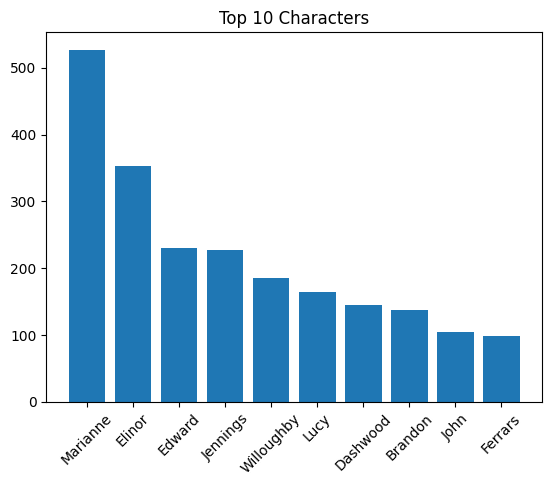

In [ ]:
import matplotlib.pyplot as plt

names = [e[0] for e in entities if e[1]=='PERSON']
top10 = Counter(names).most_common(10)
labs, vals = zip(*top10)
plt.figure()
plt.bar(labs, vals)
plt.xticks(rotation=45)
plt.title('Top 10 Characters')
plt.show()


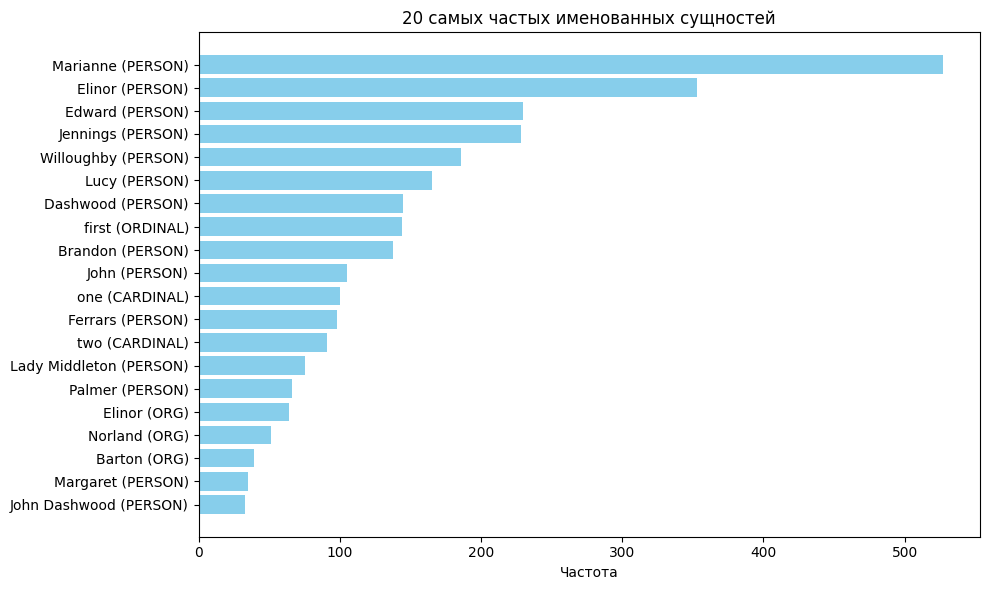

In [ ]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Загрузка модели и обработка текста
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)

# Считаем частоту сущностей
entities = [(ent.text, ent.label_) for ent in doc.ents]
ent_counts = Counter(entities).most_common(20)

# Подготовка данных для визуализации
labels = [f"{text} ({label})" for (text, label), count in ent_counts]
counts = [count for (_, _), count in ent_counts]

# Построение графика
plt.figure(figsize=(10, 6))
plt.barh(labels[::-1], counts[::-1], color='skyblue')
plt.xlabel('Частота')
plt.title('20 самых частых именованных сущностей')
plt.tight_layout()
plt.show()


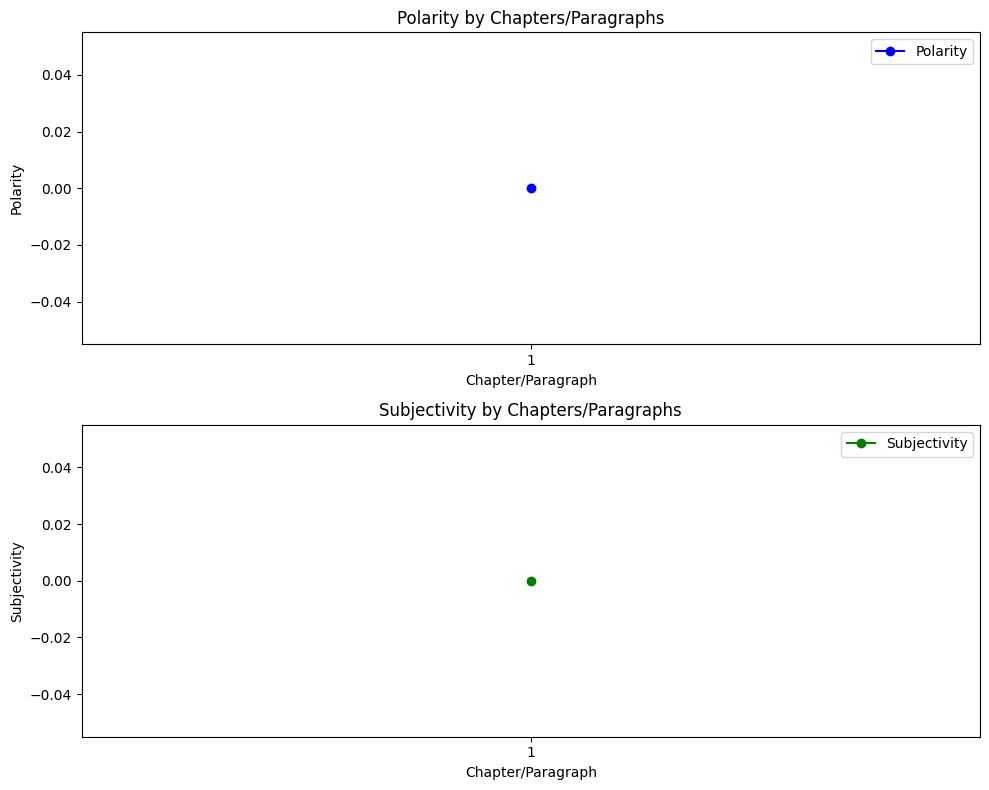

In [ ]:
import matplotlib.pyplot as plt
from textblob import TextBlob

# Ваш текст книги
text = '''[Ваш текст из книги]'''

# Разделение текста на главы (или абзацы)
sections = text.split('\n\n\n')[:10]  # первые 10 глав или абзацев

# Списки для хранения полярности и субъективности
polarities = []
subjectivities = []

# Процесс анализа текста
for i, sec in enumerate(sections, 1):
    sec_blob = TextBlob(sec)
    polarities.append(sec_blob.sentiment.polarity)
    subjectivities.append(sec_blob.sentiment.subjectivity)

# Создание графика
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# График полярности
ax[0].plot(range(1, len(polarities) + 1), polarities, marker='o', color='blue', label='Polarity')
ax[0].set_title('Polarity by Chapters/Paragraphs')
ax[0].set_xlabel('Chapter/Paragraph')
ax[0].set_ylabel('Polarity')
ax[0].set_xticks(range(1, len(polarities) + 1))
ax[0].legend()

# График субъективности
ax[1].plot(range(1, len(subjectivities) + 1), subjectivities, marker='o', color='green', label='Subjectivity')
ax[1].set_title('Subjectivity by Chapters/Paragraphs')
ax[1].set_xlabel('Chapter/Paragraph')
ax[1].set_ylabel('Subjectivity')
ax[1].set_xticks(range(1, len(subjectivities) + 1))
ax[1].legend()

# Показать графики
plt.tight_layout()
plt.show()


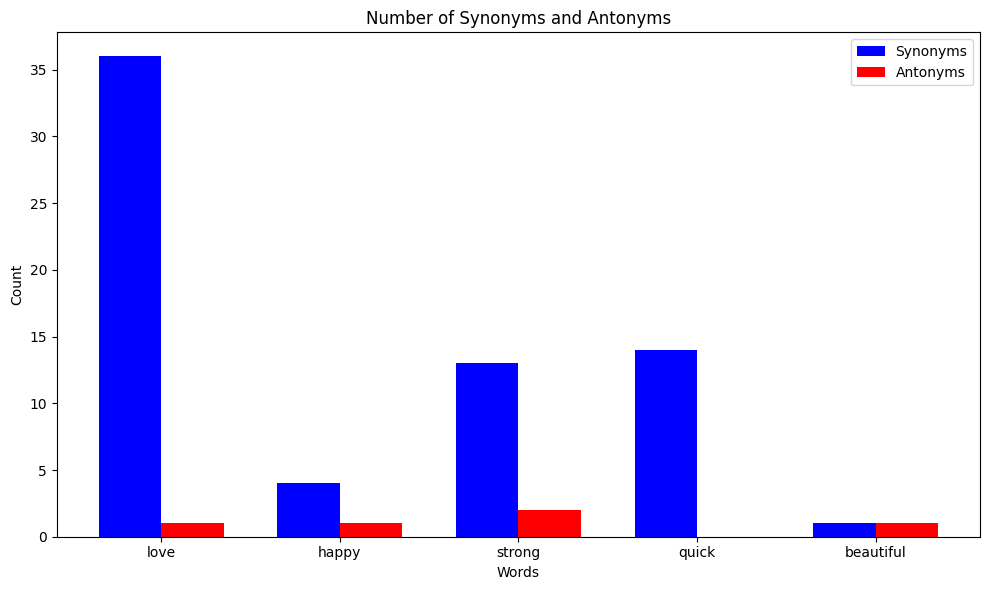

In [ ]:
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn

# Функция для получения синонимов и антонимов
def get_synonyms_antonyms(word):
    syns = set()
    ants = set()
    for syn in wn.synsets(word):
        for lemma in syn.lemmas():
            syns.add(lemma.name())
            if lemma.antonyms():
                ants.add(lemma.antonyms()[0].name())
    return syns, ants

# Слова для анализа
words = ['love', 'happy', 'strong', 'quick', 'beautiful']

# Списки для хранения количества синонимов и антонимов
synonym_counts = []
antonym_counts = []

# Анализ каждого слова
for word in words:
    syns, ants = get_synonyms_antonyms(word)
    synonym_counts.append(len(syns))
    antonym_counts.append(len(ants))

# Построение графика
fig, ax = plt.subplots(figsize=(10, 6))

# Индексы для слов
index = range(len(words))

# Построение столбчатых диаграмм
bar_width = 0.35
ax.bar(index, synonym_counts, bar_width, label='Synonyms', color='blue')
ax.bar([i + bar_width for i in index], antonym_counts, bar_width, label='Antonyms', color='red')

# Оформление графика
ax.set_xlabel('Words')
ax.set_ylabel('Count')
ax.set_title('Number of Synonyms and Antonyms')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(words)
ax.legend()

# Показать график
plt.tight_layout()
plt.show()


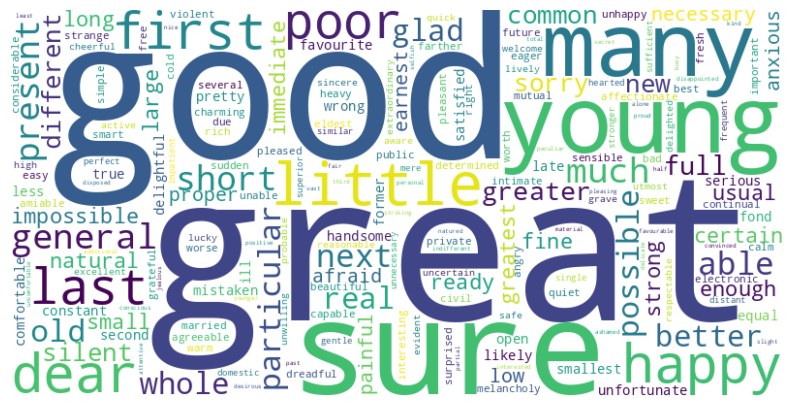

In [ ]:
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Применяем spacy для анализа текста
nlp = spacy.load('en_core_web_sm')

# Текст уже загружен в переменную 'text' (предполагаем, что это текст книги)
doc = nlp(text)

# Собираем все прилагательные, связанные с именами персонажей
adjectives = [token.text.lower() for token in doc if token.pos_ == 'ADJ' and token.dep_ in ('amod', 'acomp')]

# Генерация облака слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(adjectives))

# Отображаем облако слов
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Не показывать оси
plt.show()


Type–Token Ratio (TTR) for the entire text: 0.0539


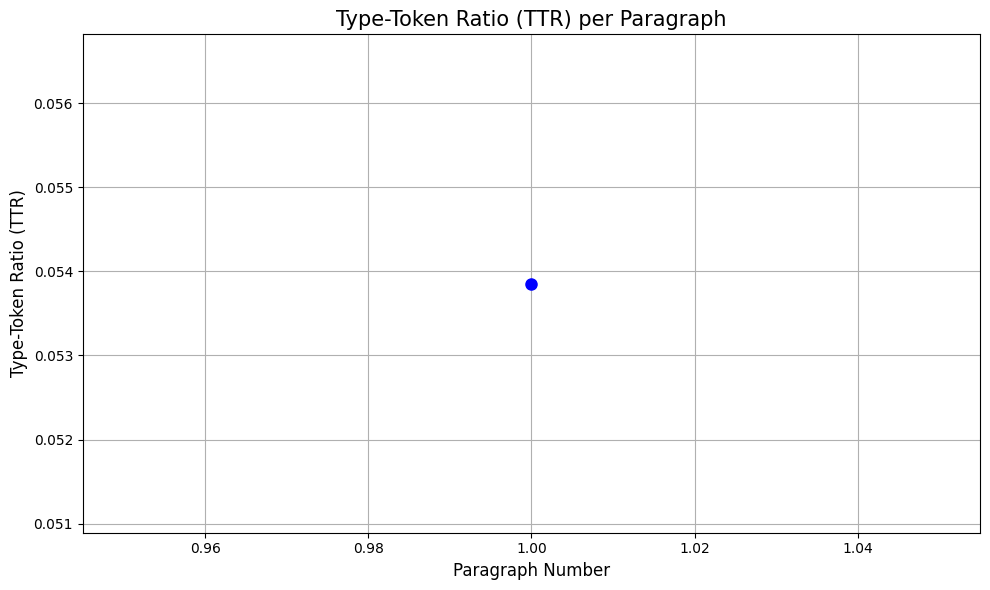

In [ ]:
import spacy
import matplotlib.pyplot as plt

# Применяем spacy для анализа текста
nlp = spacy.load('en_core_web_sm')

# Текст уже загружен в переменную 'text' (предполагаем, что это текст книги)
doc = nlp(text)

# Разбиваем текст на токены (слова)
tokens = [token.text.lower() for token in doc if token.is_alpha]

# Вычисляем TTR (Type-Token Ratio)
ttr = len(set(tokens)) / len(tokens)
print('Type–Token Ratio (TTR) for the entire text:', round(ttr, 4))

# Разбиваем текст на более мелкие части (например, на абзацы)
sections = text.split('\n\n\n')[:10]  # Возьмем первые 10 абзацев для анализа
ttr_values = []

# Для каждой части текста вычисляем TTR
for section in sections:
    section_doc = nlp(section)
    section_tokens = [token.text.lower() for token in section_doc if token.is_alpha]
    ttr_value = len(set(section_tokens)) / len(section_tokens)
    ttr_values.append(ttr_value)

# Визуализация TTR для каждого абзаца
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ttr_values) + 1), ttr_values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title('Type-Token Ratio (TTR) per Paragraph', fontsize=15)
plt.xlabel('Paragraph Number', fontsize=12)
plt.ylabel('Type-Token Ratio (TTR)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


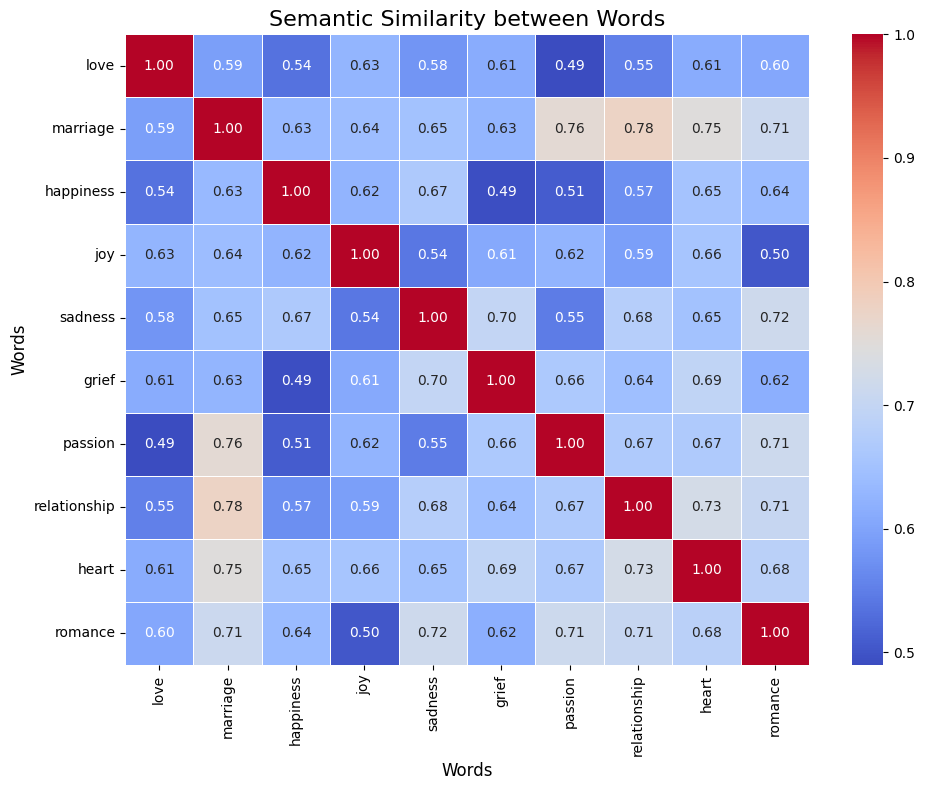

In [ ]:
import spacy
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
import seaborn as sns

# Загружаем модель spaCy
nlp = spacy.load('en_core_web_sm')

# Список слов для анализа
words = ['love', 'marriage', 'happiness', 'joy', 'sadness', 'grief', 'passion', 'relationship', 'heart', 'romance']

# Получаем векторы для каждого слова
word_vectors = np.array([nlp(word).vector for word in words])

# Вычисляем косинусную близость между каждым парой слов
similarity_matrix = np.zeros((len(words), len(words)))

for i in range(len(words)):
    for j in range(len(words)):
        similarity_matrix[i][j] = 1 - cosine(word_vectors[i], word_vectors[j])

# Создаем тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, xticklabels=words, yticklabels=words, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Semantic Similarity between Words', fontsize=16)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.tight_layout()
plt.show()
